# Shallow Neural Network Lab Tutorial with PyTorch

In this tutorial, we will:

1. Create a **perceptron** (a single-layer linear model) that accepts 1D inputs.
2. Explore and compare a couple of activation functions (including a custom implementation of **ReLU**).
3. Build a **shallow neural network** with:
   - **One input**
   - **Three hidden units** (in a single hidden layer)
   - **One output**
4. Plot a diagram of the shallow network.
5. Define parameters, generate dummy data, run the network, and compute the **least squares loss** (Mean Squared Error).

Follow along with the code cells and comments. At the end, you will find a list of exercises for further exploration.


In [3]:
# Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Check PyTorch version
print("PyTorch version:", torch.__version__)


PyTorch version: 2.5.1+cu124


## 1. Perceptron Example (1D Inputs)

A perceptron is a single-layer linear model. For 1D inputs, it performs a simple linear transformation:

\[
y = w \cdot x + b
\]

We will define a perceptron using PyTorch’s `nn.Linear` layer and run it on some dummy data.


In [4]:
# Define a simple perceptron with 1 input and 1 output.
perceptron = nn.Linear(in_features=1, out_features=1)

# Generate some dummy data: 1D inputs.
# For example, let's create 10 data points between -10 and 10.
x = torch.linspace(-10, 10, steps=10).unsqueeze(1)  # shape (10, 1)
print("Input x:\n", x)

# Compute the perceptron output
output = perceptron(x)
print("Perceptron output:\n", output)


Input x:
 tensor([[-10.0000],
        [ -7.7778],
        [ -5.5556],
        [ -3.3333],
        [ -1.1111],
        [  1.1111],
        [  3.3333],
        [  5.5556],
        [  7.7778],
        [ 10.0000]])
Perceptron output:
 tensor([[-8.1919],
        [-6.5214],
        [-4.8509],
        [-3.1805],
        [-1.5100],
        [ 0.1604],
        [ 1.8309],
        [ 3.5014],
        [ 5.1718],
        [ 6.8423]], grad_fn=<AddmmBackward0>)


## 2. Exploring Activation Functions

Neural networks use activation functions to introduce non-linearity. In this section, we will explore two built-in activation functions, **Sigmoid** and **Tanh**, and also implement our own **ReLU**.

### Custom Implementation of ReLU

The ReLU (Rectified Linear Unit) function is defined as:

\[
\text{ReLU}(x) = \max(0, x)
\]

Let's implement it as a function.


In [5]:
def custom_relu(x):
    """
    Custom implementation of the ReLU activation function.
    Returns element-wise max(0, x).
    """
    return torch.where(x > 0, x, torch.zeros_like(x))


### Plotting Activation Functions

Let's compare **Sigmoid**, **Tanh**, and our custom **ReLU** by plotting them over a range of values.


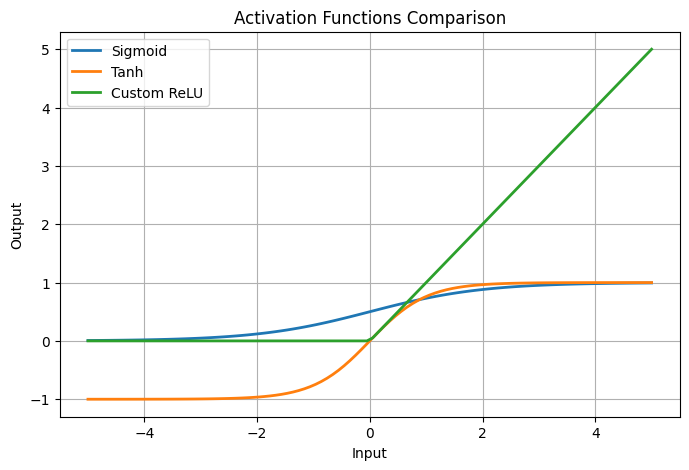

In [6]:
# Create a range of input values
x_values = torch.linspace(-5, 5, steps=100)
x_numpy = x_values.numpy()

# Compute activation function outputs
sigmoid_values = torch.sigmoid(x_values).detach().numpy()
tanh_values = torch.tanh(x_values).detach().numpy()
relu_values = custom_relu(x_values).detach().numpy()

# Plot the activation functions
plt.figure(figsize=(8, 5))
plt.plot(x_numpy, sigmoid_values, label="Sigmoid", linewidth=2)
plt.plot(x_numpy, tanh_values, label="Tanh", linewidth=2)
plt.plot(x_numpy, relu_values, label="Custom ReLU", linewidth=2)
plt.title("Activation Functions Comparison")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


## 3. Define a Shallow Neural Network

Now, we build a shallow neural network with:
- **One input unit**
- **Three hidden units** in one hidden layer
- **One output unit**

We will allow a selectable activation function (defaulting to PyTorch’s ReLU, but here we use our custom ReLU). The network architecture is:



In [7]:
class ShallowNet(nn.Module):
    def __init__(self, activation=F.relu):
        """
        Initialize the shallow neural network.

        Parameters:
        - activation: Activation function to use in the hidden layer (default: ReLU).
        """
        super(ShallowNet, self).__init__()
        self.fc1 = nn.Linear(in_features=1, out_features=3)  # Input to hidden layer
        self.fc2 = nn.Linear(in_features=3, out_features=1)  # Hidden to output layer
        self.activation = activation

    def forward(self, x):
        """
        Forward pass of the network.
        """
        # Pass through first layer
        x = self.fc1(x)
        # Apply activation function
        x = self.activation(x)
        # Pass through second layer
        x = self.fc2(x)
        return x


In [8]:
# Instantiate the network with a custom activation function.
# You can also try torch.sigmoid or torch.tanh by replacing custom_relu.
net = ShallowNet(activation=custom_relu)
print(net)


ShallowNet(
  (fc1): Linear(in_features=1, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)


## 4. Plotting the Shallow Network Diagram

Let's create a simple diagram of our network using **networkx** and **matplotlib**. The diagram will show:
- One **input** node
- Three **hidden** nodes (labeled Hidden1, Hidden2, Hidden3)
- One **output** node

Edges connect the input to each hidden unit and each hidden unit to the output.


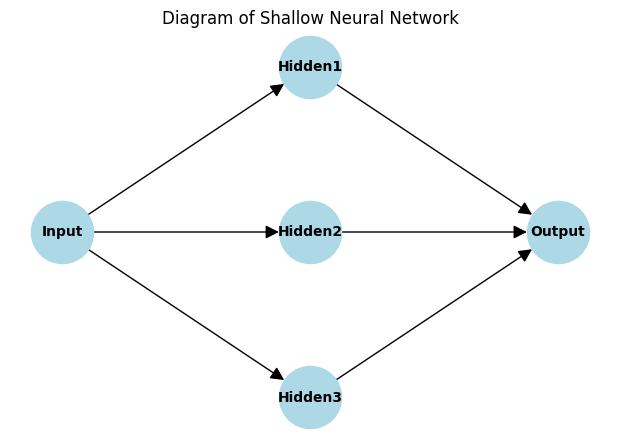

In [10]:
def plot_shallow_network():
    # Create a directed graph
    G = nx.DiGraph()

    # Define node positions (x, y coordinates)
    pos = {
        "Input": (0, 0),
        "Hidden1": (1, 1),
        "Hidden2": (1, 0),
        "Hidden3": (1, -1),
        "Output": (2, 0)
    }

    # Add nodes to the graph
    for node in pos:
        G.add_node(node)

    # Add edges from Input to each Hidden unit
    G.add_edge("Input", "Hidden1")
    G.add_edge("Input", "Hidden2")
    G.add_edge("Input", "Hidden3")
    # Add edges from each Hidden unit to Output
    G.add_edge("Hidden1", "Output")
    G.add_edge("Hidden2", "Output")
    G.add_edge("Hidden3", "Output")

    # Draw the graph
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue',
            arrowsize=20, font_size=10, font_weight='bold')
    plt.title("Diagram of Shallow Neural Network")
    plt.show()

# Plot the network diagram
plot_shallow_network()


## 5. Running the Neural Network and Computing the Loss

We will:
1. Define parameters and generate dummy data.
2. Run the shallow neural network.
3. Compute the **least squares loss** (Mean Squared Error) between the network output and the target.

Assume the true underlying relationship is:

\[
y = 2x + 1
\]


In [11]:
# Define dummy data: 100 1D input points
x_data = torch.linspace(-5, 5, steps=100).unsqueeze(1)  # shape: (100, 1)
# Define target data according to y = 2x + 1
y_target = 2 * x_data + 1

# Run the network on the dummy data
y_pred = net(x_data)

# Define the mean squared error loss
loss_fn = nn.MSELoss()

# Compute the loss
loss = loss_fn(y_pred, y_target)
print("Mean Squared Error Loss:", loss.item())


Mean Squared Error Loss: 32.214752197265625


## 6. Exercises for Further Exploration

**Exercise 1:**  
Modify the number of hidden units (e.g., change from 3 to 5) in the `ShallowNet` class and observe how the network's performance (loss) changes.

**Exercise 2:**  
Replace the activation function with a different one (e.g., `torch.sigmoid` or `torch.tanh`) when instantiating the network and compare the outputs and loss.
